In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sc
import networkx as ntx
from numpy.random import choice
import scipy.sparse.linalg as spla

In [4]:
def E0(layers):
    m1=[]
    for j in np.arange(0,8*layers,8):
        m1.append([(i+j,i+1+j) for i in range(7)])
    return np.array(m1).reshape(-1,2)

In [6]:
def E1(layers):
    m2=[]
    for j in np.arange(0,8*(layers-1),8):
        m2.append(np.array([((j+i,j+7+i),(j+i,j+7+2+i)) for i in np.arange(1,7,2)]))
    m2=np.array(m2).reshape(-1,2)
    return m2

In [8]:
def E2(layers):
    m3=[]
    m3.append([(j+7,j+14) for j in np.arange(0,8*(layers-1),8)])
    m3=np.array(m3).reshape(-1,2)
    return m3

In [10]:
def E3(layers):
    m4=[]
    m4.append([(8*layers+1,i) for i in np.arange(0,7,2)])
    return np.array(m4).reshape(-1,2)

In [12]:
def E4(layers):
    m5=[]
    m5.append([(layers*8,i) for i in np.arange((layers-1)*8+1,layers*8,2)])
    return np.array(m5).reshape(-1,2)

In [ ]:
E4(10)

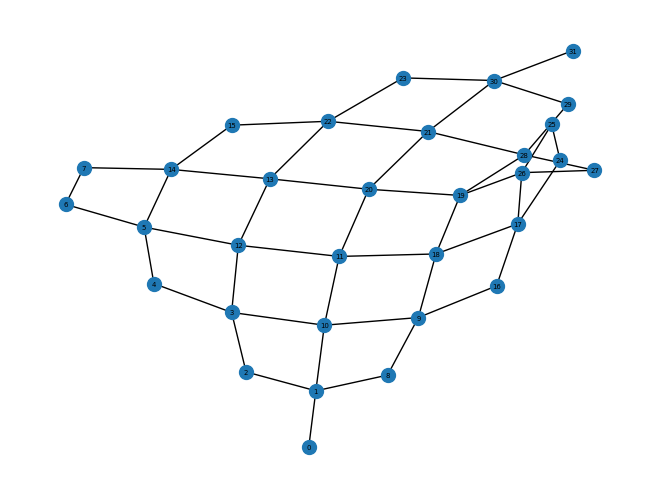

In [46]:
def create_graph(layers,seed):
    np.random.seed(seed)
    number_of_indices = 8*layers
    G = ntx.Graph()
    #G.add_nodes_from(range(8 * layers))
    e0 = E0(layers)
    e1 = E1(layers)
    e2 = E2(layers)
    e3 = E3(layers)
    e4 = E4(layers)
    G.add_edges_from(e0)
    G.add_edges_from(e1)
    G.add_edges_from(e2)
  #  G.add_edges_from(e3)
  #  G.add_edges_from(e4)
#    G.add_edges_from(((0,11),(6,20)))
    return G

G = create_graph(4,2)
pos = ntx.spring_layout(G)
# Draw graph with node labels
ntx.draw(G, pos, with_labels=True, node_size=100, font_size=5)

# Add custom node labels at positions
#labels = {node: node for node in G.nodes()}  
#ntx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="white")

#plt.show()

In [18]:
def generate_random_values(mean, std, seed, num_edges):
    np.random.seed(seed)
    return np.abs(np.random.normal(mean, std, num_edges))

In [32]:
def matrix_interactions(layers,std):
    grid = create_graph(layers,1)
    num_edges = grid.number_of_edges()
    nodes = grid.number_of_nodes()
#    print(nodes)
    cap_values = np.abs(generate_random_values(10, std, 1, num_edges))
    
    adjM = sc.lil_matrix((nodes, nodes))
    xxx = list(grid.edges())
    interactions = 1/cap_values
    
    for edge_idx, (i, j) in enumerate(xxx):
        if i < nodes and j < nodes:  # Check if indices are valid
            interaction_value = interactions[edge_idx]
            adjM[i, j] = interaction_value
            adjM[j, i] = interaction_value
        else:
            print(f"Warning: Skipping invalid edge ({i}, {j})")   # Ensure the matrix is symmetric
    
    adjM.setdiag(-1*adjM.sum(axis=1).A1 - 0.0001)
    
    MI = spla.inv(-1*adjM.tocsc())  # Using inv for CSC matrices
    
    return MI,nodes

In [38]:
def R(layers,a,b):
    MI,nodes = matrix_interactions(layers)
    return MI[a, a] + MI[b, b] - MI[a,b] - MI[b, a] 

In [40]:
Rinplane = [R(100,0,7,std ) for std in np.arange(0,5,0.1) ]
Routplane = [R(100,0,100*8-1,std ) for std in np.arange(0,5,0.1) ]

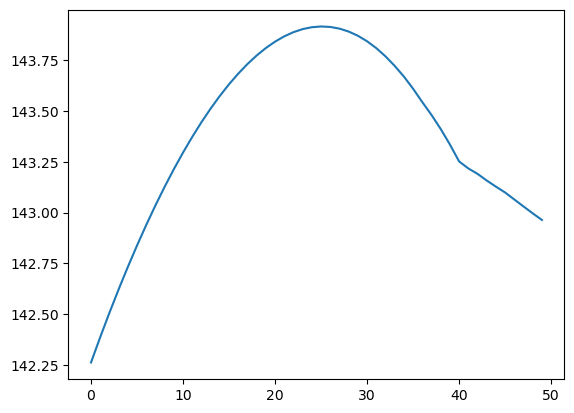

In [44]:
plt.plot(Routplane)

In [ ]:
Rin=[]
for layers in np.arange(10,100,1):
    p = []
    for a in np.arange(0,7,2):
        for b in np.arange(8*(layers-1)+1,8*layers,2):
            p.append(R(layers,a,b))            
            
    Rin.append(np.array(p).sum())

In [ ]:
Roop=[]
for layers in np.arange(10,100,1):
    Roop.append(R(layers))

In [ ]:
plt.plot(np.arange(10,1000,50),np.log([R(layers,0,8*layers-1) for layers in np.arange(10,1000,50)]),color ='red')


In [ ]:
Rinp=[]
for layers in np.arange(10,100,1):
    Rinp.append(R(layers))

In [ ]:
plt.plot(np.arange(10,1000,50),[R(layers,0,7) for layers in np.arange(10,1000,50)],color='black')